<a href="https://colab.research.google.com/github/Yiqing35/ESG-Investing/blob/main/ESG_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
from scipy.optimize import minimize 
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

In [ ]:
carbonesg=pd.read_csv('https://raw.githubusercontent.com/Yiqing35/ESG-Investing/main/carbon_esg_data.csv')
carbonesg.head()

,stock name,MSCI World weight,SPX weigth,industry,sector,country,region,CO2e scope 1,CO2e scope 3,CO2e scope 2,...,CI scope 2,CI scope 3,ESG,E,S,G,sedol,cusip,isin,permno
0,10X GENOMICS INC.,0.02%,NaN,Life Sciences Tools & Services,Health Care,USA,Americas,NaN,NaN,NaN,...,NaN,NaN,3.4,6.1,3.9,5.1,BKS3RS7,88025U109,US88025U1097,NaN
1,3I GROUP PLC,0.03%,NaN,Capital Markets,Financials,UKI,Europe,1.511570e+02,11708.473,455.918,...,1.104000,28.347000,7.9,10.0,5.1,7.6,B1YW440,G88473148,GB00B1YW4409,NaN
2,3M COMPANY,0.17%,0.26%,Industrial Conglomerates,Industrials,USA,Americas,3.969363e+06,7558070.294,1780000.000,...,55.389594,235.190139,8.6,6.0,4.6,6.2,2595708,88579Y101,US88579Y1010,22592.0
3,A. O. SMITH CORPORATION,0.02%,0.03%,Building Products,Industrials,USA,Americas,7.182400e+04,872492.525,98326.000,...,32.855000,291.540000,6.8,7.1,5.5,3.0,2816023,831865209,US8318652091,65402.0
4,A.P. MOELLER - MAERSK A/S,0.03%,NaN,Marine,Industrials,DEN,Europe,3.620370e+07,4799613.079,287000.000,...,7.379789,123.415096,8.4,6.2,6.2,6.2,4253048,K0514G101,DK0010244508,NaN


In [ ]:
spcov=pd.read_csv('https://raw.githubusercontent.com/Yiqing35/ESG-Investing/main/sp500_cov1.csv').rename(columns={"Unnamed: 0": "permno"}).set_index("permno")
spcov.head()

,10104.0,10107.0,10138.0,10145.0,10516.0,10696.0,10909.0,11308.0,11403.0,11404.0,...,92614.0,92655.0,92778.0,93002.0,93089.0,93096.0,93132.0,93246.0,93429.0,93436.0
permno,,,,,,,,,,,,,,,,,,,,,
10104.0,0.011841,0.002538,0.002723,0.002322,0.001791,0.002047,0.002587,0.001799,0.002964,0.001239,...,0.001508,0.002221,0.002159,0.002588,0.001824,0.001634,0.003438,0.002178,0.001609,0.003269
10107.0,0.002538,0.006949,0.002643,0.002313,0.001783,0.002085,0.002364,0.001813,0.002856,0.001236,...,0.001444,0.002199,0.002120,0.002489,0.001770,0.001581,0.003262,0.001925,0.001506,0.003245
10138.0,0.002723,0.002643,0.006747,0.002714,0.002082,0.002334,0.002607,0.002072,0.003107,0.001487,...,0.001673,0.002462,0.002482,0.002635,0.001976,0.001806,0.003244,0.002386,0.001861,0.003299
10145.0,0.002322,0.002313,0.002714,0.005880,0.001873,0.002096,0.002205,0.001868,0.002729,0.001335,...,0.001475,0.002171,0.002284,0.002281,0.001732,0.001586,0.002758,0.002058,0.001611,0.002896
10516.0,0.001791,0.001783,0.002082,0.001873,0.006417,0.001599,0.001725,0.001446,0.002103,0.001035,...,0.001149,0.001688,0.001710,0.001741,0.001346,0.001274,0.002105,0.001620,0.001257,0.002209


In [ ]:
spmean=pd.read_csv('https://raw.githubusercontent.com/Yiqing35/ESG-Investing/main/sp500_mean%202.csv').rename(columns={"identifier ":"permno"}).set_index("permno").T
spmean.head()

permno,mean
10104,0.020956
10107,0.018042
10138,0.016959
10145,0.012697
10516,0.007059


### Q6


In [ ]:
def sig_2(r_p, A_p): 
    ''' 
    For a given needed return r_p and fundamental matrix A_p,  
    the corresponding variance, return and Sharpe Ratio are returned 
    ''' 
    sig_p_2 = (A_p[0,0]-2*A_p[0,1]*r_p+A_p[1,1]*r_p**2)/(A_p[0,0]*A_p[1,1]-A_p[0,1]**2) 
    return sig_p_2, r_p, r_p/np.sqrt(sig_p_2)  

from numba import njit

@njit
def objective(w): 
    ''' 
    Get sigma via scipy Optimization 
    ''' 
    s_p = np.sqrt((V @ w).T @ w) 
    return s_p 

In [ ]:
#Define EXCESS RETURNS, standard deviation and correlations of the assets 
mu_1 = spmean['mean'].to_numpy()
V = spcov.to_numpy()

In [ ]:
df_assts = pd.DataFrame(mu_1) 
df_assts['sig'] = np.sqrt(np.diag(V)) 
df_assts.columns = ['ret', 'sig'] 

In [ ]:
df_assts.head(2)

,ret,sig
0,0.020956,0.108815
1,0.018042,0.083362


In [ ]:
guess = np.random.normal(0,1,len(df_assts))
df_ws_q6 = pd.DataFrame(np.zeros(len(df_assts)))
df_ws_q6.columns = ['weight']
sig_q6 = None
ret_q6 = None

In [ ]:
cons = (# The weights must sum up to one - equality.
{"type":"eq", "fun": lambda x: np.sum(x)-1},
# This constraints says that the inequalities (ineq) must be non-negative.
# The expected return of our portfolio that we want to be at or greater than X (e.g., 11%)
)
# Every stock can get any weight from 0 to 1
bounds = tuple((0,1) for x in range(len(df_assts)))
#Optimization and result storing
res = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
df_ws_q6['weight'] = res.x
sig_q6 = res.fun
ret_q6 = np.sum(mu_1*res.x)

In [ ]:
df_ws_q6['permno'] = spmean.index.tolist()
df_ws_q6['permno'] = df_ws_q6['permno'].astype(np.float64)

In [ ]:
merged = df_ws_q6.merge(carbonesg, how='left', left_on='permno', right_on='permno')
merged['SPX weigth'] = merged['SPX weigth'].str.strip("%").astype(np.float64) / 100.0

In [ ]:
merged.head()

,weight,permno,stock name,MSCI World weight,SPX weigth,industry,sector,country,region,CO2e scope 1,...,CI scope 1,CI scope 2,CI scope 3,ESG,E,S,G,sedol,cusip,isin
0,0.000000e+00,10104.0,ORACLE CORPORATION,0.29%,0.0039,Software,Information Technology,USA,Americas,1.796076e+04,...,0.454634,12.401078,51.502447,5.7,7.7,5.1,3.4,2661568,68389X105,US68389X1054
1,0.000000e+00,10107.0,MICROSOFT CORPORATION,3.96%,0.0640,Software,Information Technology,USA,Americas,1.134142e+05,...,0.901236,28.261826,47.499565,9.0,8.1,6.8,5.2,2588173,594918104,US5949181045
2,7.259627e-17,10138.0,T. ROWE PRICE GROUP INC.,0.08%,0.0012,Capital Markets,Financials,USA,Americas,1.865920e+03,...,0.332138,4.449883,28.904494,8.2,10.0,5.4,6.9,2702337,74144T108,US74144T1088
3,0.000000e+00,10145.0,HONEYWELL INTERNATIONAL INC.,0.24%,0.0036,Industrial Conglomerates,Industrials,USA,Americas,1.090293e+06,...,29.700963,25.933204,186.998589,7.2,4.1,3.1,6.0,2020459,438516106,US4385161066
4,1.281445e-17,10516.0,ARCHER-DANIELS-MIDLAND COMPANY,0.06%,0.0009,Food Products,Consumer Staples,USA,Americas,1.479813e+07,...,228.874795,46.554070,552.470290,7.8,6.2,6.0,4.8,2047317,39483102,US0394831020


In [ ]:
# I think they really want an alternative measure and map to SP500 stock as the proxy, instead of a combination of existing.

In [ ]:
for col in ['CO2e scope 1', 'CO2e scope 2', 'CO2e scope 3', 'CI scope 1', 'CI scope 2', 'CI scope 3']:
    merged[col] = merged.groupby("sector")[col].transform("median")

In [ ]:
sector_weight = merged.groupby("sector")['weight'].sum().sort_values(ascending=False)

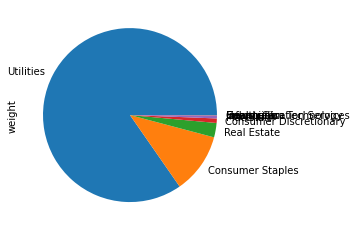

In [ ]:
sector_weight.plot(kind='pie')

In [ ]:
sector_weight # overweight utilities, consumer staples, real estate

sector
Utilities                 8.466534e-01
Consumer Staples          1.121405e-01
Real Estate               2.669688e-02
Consumer Discretionary    8.308309e-03
Materials                 5.576516e-03
Financials                6.243973e-04
Industrials               8.290315e-16
Information Technology    8.267782e-16
Health Care               5.569239e-16
Energy                    1.921464e-16
Communication Services    1.705841e-16
Name: weight, dtype: float64

## Q7

In [ ]:
guess = np.random.normal(0,1,len(df_assts))
ts = np.linspace(min(mu_1), max(mu_1)-0.001, 100)
df_ws_q7 = pd.DataFrame(np.zeros((len(df_assts),len(ts))))
df_sigs_q7 = pd.DataFrame(np.zeros(len(ts)))
df_rets_q7 = pd.DataFrame(np.zeros(len(ts)))
for i,t in tqdm(enumerate(ts)):
    cons = (# The weights must sum up to one - equality.
    {"type":"eq", "fun": lambda x: np.sum(x)-1},
    # This constraints says that the inequalities (ineq) must be non-negative.
    # The expected return of our portfolio that we want to be at or greater than X (e.g., 11%)
    {"type": "ineq", "fun": lambda x: np.sum(mu_1*x)-t})
    # Every stock can get any weight from 0 to 1
    bounds = tuple((0,1) for x in range(len(df_ws_q7)))

    #Optimization and result storing
    res = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
    df_ws_q7.iloc[:,i] = res.x
    df_sigs_q7.iloc[i,:] = res.fun
    df_rets_q7.iloc[i,:] = np.sum(mu_1*res.x)
    guess = res.x # use the previous result to warm start

0it [00:00, ?it/s]

In [ ]:
df_sigs_q7['ret'] = (df_ws_q7.T * mu_1).sum(axis=1)
df_sigs_q7 = df_sigs_q7.dropna()
df_sigs_q7.columns = ['sig','ret']

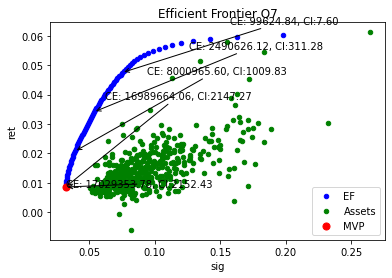

In [ ]:
fig, ax = plt.subplots() 
df_sigs_q7.plot.scatter('sig','ret',ax=ax,c='blue', label='EF')
df_assts.plot.scatter('sig', 'ret', ax=ax, c='green', s = 20, label="Assets") 
ax.scatter(sig_q6, ret_q6, c="red", label="MVP",s=50)
q6_ce1 = np.sum(np.multiply(df_ws_q6['weight'] , merged['CO2e scope 1']))
q6_ci1 = np.sum(np.multiply(df_ws_q6['weight'] , merged['CI scope 1']))
ax.annotate(f"CE: {q6_ce1:.2f}, CI:{q6_ci1:.2f}", xy=(sig_q6, ret_q6),arrowprops=dict(arrowstyle="->"))
for i, (tmp_sig, tmp_ret) in enumerate(zip(df_sigs_q7['sig'][20::20], df_sigs_q7['ret'][20::20])):
    tmp_ce1 = np.sum(np.multiply(df_ws_q7.iloc[:, 20+i*20] , merged['CO2e scope 1']))
    tmp_ci1 = np.sum(np.multiply(df_ws_q7.iloc[:, 20+i*20] , merged['CI scope 1']))
    ax.annotate(f"CE: {tmp_ce1:.2f}, CI:{tmp_ci1:.2f}", xy=(tmp_sig, tmp_ret), xytext=(sig_q6*(i+1)+0.03, ret_q6*(i+1)+0.03), arrowprops=dict(arrowstyle="->"))
plt.legend()
plt.title('Efficient Frontier Q7') 
plt.show() 

In [ ]:
benchmark_ce1 = np.sum(np.multiply( merged['SPX weigth'], merged['CO2e scope 1']))
benchmark_ci1 = np.sum(np.multiply( merged['SPX weigth'], merged['CI scope 1']))
benchmark_ce2 = np.sum(np.multiply( merged['SPX weigth'], merged['CO2e scope 2']))
benchmark_ci2 = np.sum(np.multiply( merged['SPX weigth'], merged['CI scope 2']))
benchmark_ce3 = np.sum(np.multiply( merged['SPX weigth'], merged['CO2e scope 3']))
benchmark_ci3 = np.sum(np.multiply( merged['SPX weigth'], merged['CI scope 3']))
print(f"CO2e scope 1: SP500 Benchmark: {benchmark_ce1} | Optimized: {q6_ce1}")
print(f"CI scope 1: SP500 Benchmark: {benchmark_ci1} | Optimized: {q6_ci1}")
print("no reduction")

CO2e scope 1: SP500 Benchmark: 1782814.4384700595 | Optimized: 26830991.958111793
CI scope 1: SP500 Benchmark: 105.47891076858618 | Optimized: 2009.246732001095
no reduction


##Q8

In [ ]:
guess = np.random.normal(0,1,len(df_assts))
ci_constraints = [(benchmark_ci1*0.25, benchmark_ci2*0.25, benchmark_ci3*0.25), \
                  (benchmark_ci1*0.5, benchmark_ci2*0.5, benchmark_ci3*0.5),\
                  (benchmark_ci1*0.75, benchmark_ci2*0.75, benchmark_ci3*0.75),\
                  (benchmark_ci1, benchmark_ci2, benchmark_ci3)]
df_ws_q8 = pd.DataFrame(np.zeros((len(df_assts),len(ci_constraints))))
df_sigs_q8 = pd.DataFrame(np.zeros(len(ci_constraints)))
df_rets_q8 = pd.DataFrame(np.zeros(len(ci_constraints)))
for i,t in tqdm(enumerate(ci_constraints)):
    cons = (# The weights must sum up to one - equality.
    {"type":"eq", "fun": lambda x: np.sum(x)-1},
    # This constraints says that the inequalities (ineq) must be non-negative.
    # The expected return of our portfolio that we want to be at or greater than X (e.g., 11%)
    {"type": "ineq", "fun": lambda x: -np.sum(merged['CI scope 1'].values*x)+t[0]},
    {"type": "ineq", "fun": lambda x: -np.sum(merged['CI scope 2'].values*x)+t[1]},
    {"type": "ineq", "fun": lambda x: -np.sum(merged['CI scope 3'].values*x)+t[2]}, # >= 0
    )
    # Every stock can get any weight from 0 to 1
    bounds = tuple((0,1) for x in range(len(df_ws_q7)))

    #Optimization and result storing
    res = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
    df_ws_q8.iloc[:,i] = res.x
    df_sigs_q8.iloc[i,:] = res.fun
    df_rets_q8.iloc[i,:] = np.sum(mu_1*res.x)
    guess = res.x

0it [00:00, ?it/s]

In [ ]:
df_ws_q8.columns = ['25%benchmark','50%benchmark', '75%benchmark', '100%benchmark']

In [ ]:
merged_q8 = pd.concat([merged, df_ws_q8], axis=1)

In [ ]:
for col in df_ws_q8.columns:
    print(col)
    tmp_df = merged_q8.groupby("industry")[col].sum().sort_values(ascending=False)
    print(tmp_df[tmp_df>0.001])
    print('-'*20)

25%benchmark
industry
Insurance                                       0.624055
Diversified Financial Services                  0.150783
Capital Markets                                 0.137930
Banks                                           0.076384
Equity Real Estate Investment Trusts (REITs)    0.010848
Name: 25%benchmark, dtype: float64
--------------------
50%benchmark
industry
Insurance                                       0.352334
Diversified Financial Services                  0.111501
Health Care Equipment & Supplies                0.102213
Pharmaceuticals                                 0.097396
Diversified Telecommunication Services          0.084285
Capital Markets                                 0.073531
Banks                                           0.036802
Equity Real Estate Investment Trusts (REITs)    0.031694
Multiline Retail                                0.030039
Health Care Providers & Services                0.025012
Professional Services                        

In [ ]:
# benchmark
benchmark_industry_weight = merged_q8.groupby("industry")['SPX weigth'].sum().sort_values(ascending=False)
benchmark_industry_weight

industry
Software                                                 0.1000
Semiconductors & Semiconductor Equipment                 0.0669
Technology Hardware Storage & Peripherals                0.0663
Interactive Media & Services                             0.0652
Internet & Direct Marketing Retail                       0.0443
IT Services                                              0.0422
Banks                                                    0.0420
Health Care Equipment & Supplies                         0.0352
Pharmaceuticals                                          0.0344
Capital Markets                                          0.0301
Automobiles                                              0.0276
Health Care Providers & Services                         0.0258
Equity Real Estate Investment Trusts (REITs)             0.0256
Oil Gas & Consumable Fuels                               0.0254
Specialty Retail                                         0.0243
Entertainment                  

In [ ]:
q6_industry_weight = merged_q8.groupby("industry")['weight'].sum().sort_values(ascending=False)

In [ ]:
# unconstrained minimum variance
q6_industry_weight[q6_industry_weight>0.001]

industry
Electric Utilities                              0.422509
Multi-Utilities                                 0.346660
Food Products                                   0.110546
Water Utilities                                 0.053553
Equity Real Estate Investment Trusts (REITs)    0.025265
Gas Utilities                                   0.022794
Multiline Retail                                0.010250
Metals & Mining                                 0.005979
Household Products                              0.001664
Name: weight, dtype: float64

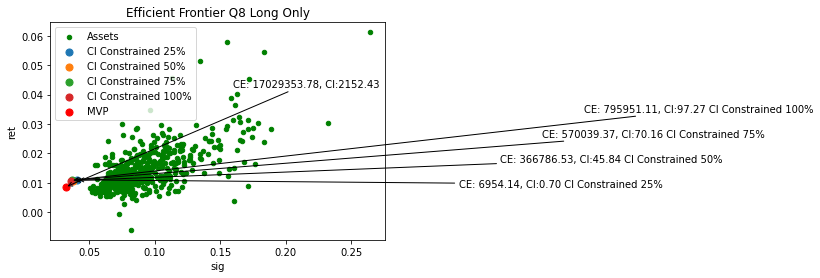

In [ ]:
fig, ax = plt.subplots() 
df_assts.plot.scatter('sig', 'ret', ax=ax, c='green', s = 20, label="Assets") 

q6_ce1 = np.sum(np.multiply(df_ws_q6['weight'] , merged['CO2e scope 1']))
q6_ci1 = np.sum(np.multiply(df_ws_q6['weight'] , merged['CI scope 1']))
ax.annotate(f"CE: {q6_ce1:.2f}, CI:{q6_ci1:.2f}", xy=(sig_q6, ret_q6),xytext=(sig_q6*5, ret_q6*5),arrowprops=dict(arrowstyle="->"))
for i, (tmp_sig, tmp_ret) in enumerate(zip(df_sigs_q8.iloc[:,0].values, df_rets_q8.iloc[:,0].values)):
    tmp_ce1 = np.sum(np.multiply(df_ws_q8.iloc[:,i] , merged['CO2e scope 1']))
    tmp_ci1 = np.sum(np.multiply(df_ws_q8.iloc[:,i] , merged['CI scope 1']))
    ax.scatter(tmp_sig, tmp_ret,label=f"CI Constrained {25*(i+1)}%",s=50)
    ax.annotate(f"CE: {tmp_ce1:.2f}, CI:{tmp_ci1:.2f} CI Constrained {25*(i+1)}%" , xy=(tmp_sig, tmp_ret),xytext=(sig_q6*(i+1)+0.3, ret_q6*(i+1)), arrowprops=dict(arrowstyle="->"))
ax.scatter(sig_q6, ret_q6, c="red", label="MVP",s=50)
plt.legend()
plt.title('Efficient Frontier Q8 Long Only') 
plt.show() 

In [ ]:
# #  L/O increase risk compared to no constraint
for tmp_sig_q8 in df_sigs_q8.iloc[:,0]:
    print(sig_q6 - tmp_sig_q8)

-0.008495674755858565
-0.006040047541871978
-0.004990322163648572
-0.004246427447485074


In [ ]:
for i, (tmp_sig, tmp_ret) in enumerate(zip(df_sigs_q8.iloc[:,0].values, df_rets_q8.iloc[:,0].values)):
    tmp_ci1 = np.sum(np.multiply(df_ws_q8.iloc[:,i] , merged['CI scope 1']))
    print(q6_ci1 - tmp_ci1)

2151.7308698122406
2106.590823861536
2082.272902790047
2055.1581943356396


In [ ]:
# lower CI -> higher risk

In [ ]:
guess = np.random.normal(0,1,len(df_assts))
ci_constraints = [(benchmark_ci1*0.25, benchmark_ci2*0.25, benchmark_ci3*0.25), \
                  (benchmark_ci1*0.5, benchmark_ci2*0.5, benchmark_ci3*0.5),\
                  (benchmark_ci1*0.75, benchmark_ci2*0.75, benchmark_ci3*0.75),\
                  (benchmark_ci1, benchmark_ci2, benchmark_ci3)]
df_ws_q8_ls = pd.DataFrame(np.zeros((len(df_assts),len(ci_constraints))))
df_sigs_q8_ls = pd.DataFrame(np.zeros(len(ci_constraints)))
df_rets_q8_ls = pd.DataFrame(np.zeros(len(ci_constraints)))
for i,t in tqdm(enumerate(ci_constraints)):
    cons = (# The weights must sum up to one - equality.
    {"type":"eq", "fun": lambda x: np.sum(x)-1},
    # This constraints says that the inequalities (ineq) must be non-negative.
    # The expected return of our portfolio that we want to be at or greater than X (e.g., 11%)
    {"type": "ineq", "fun": lambda x: -np.sum(merged['CI scope 1'].values*x)+t[0]},
    {"type": "ineq", "fun": lambda x: -np.sum(merged['CI scope 2'].values*x)+t[1]},
    {"type": "ineq", "fun": lambda x: -np.sum(merged['CI scope 3'].values*x)+t[2]},
    )
    bounds = tuple((-1,1) for x in range(len(df_ws_q7)))

    #Optimization and result storing
    res = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
    df_ws_q8_ls.iloc[:,i] = res.x
    df_sigs_q8_ls.iloc[i,:] = res.fun
    df_rets_q8_ls.iloc[i,:] = np.sum(mu_1*res.x)
    guess = res.x

0it [00:00, ?it/s]

In [ ]:
#  L/S reduce risk compared to no constraint
for tmp_sig_q8 in df_sigs_q8_ls.iloc[:,0]:
    print(sig_q6 - tmp_sig_q8)

0.010619266340806916
0.01086141659315153
0.011066160507675265
0.011233527175118631


In [ ]:
for i in range(len(df_sigs_q8_ls)):
    tmp_ci1 = np.sum(np.multiply(df_ws_q8_ls.iloc[:,i] , merged['CI scope 1']))
    print(q6_ci1 - tmp_ci1)

1999.0874290757952
1972.717701386145
1946.3479736967286
1919.9782460005724
